In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
train_df, test_df = pd.read_csv("./train.csv"), pd.read_csv("./test.csv")
train_df.describe(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


(       fixed acidity  volatile acidity  citric acid  residual sugar   
 count    6714.000000       6714.000000  6714.000000     6714.000000  \
 mean        7.251638          0.348436     0.317466        5.411871   
 std         1.330423          0.168505     0.148842        4.739180   
 min         3.800000          0.100000     0.000000        0.600000   
 25%         6.400000          0.200000     0.240000        1.800000   
 50%         7.000000          0.300000     0.310000        3.000000   
 75%         7.700000          0.400000     0.390000        8.000000   
 max        15.900000          1.300000     1.660000       65.800000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density   
 count  6714.000000          6714.000000           6714.000000  6714.000000  \
 mean      0.057506            30.132559            114.576259     0.994789   
 std       0.038175            17.619884             56.417138     0.003020   
 min       0.009000             1.

In [3]:
contingency_table = pd.crosstab(train_df['quality'], train_df['type']); contingency_table

type,red,white
quality,,
3,8,15
4,78,152
5,812,1553
6,637,2172
7,227,835
8,19,193
9,0,13


In [4]:
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 155.27983591806407
P-value: 5.912053877074625e-31
Degrees of Freedom: 6
Expected Frequencies:
[[   6.10113196   16.89886804]
 [  61.01131963  168.98868037]
 [ 627.35552577 1737.64447423]
 [ 745.13389931 2063.86610069]
 [ 281.71313673  780.28686327]
 [  56.2365207   155.7634793 ]
 [   3.44846589    9.55153411]]


In [5]:
def convert_df(df):
    df_encoded = pd.get_dummies(df, columns=['type'], dtype=float); 
    df_encoded = df_encoded.astype("float32")
    columns_to_exclude = ["quality", 'type_red', "type_white"] # Replace with the actual column name
    columns_to_standardize = df_encoded.columns[~df_encoded.columns.isin(columns_to_exclude)]
    scaler = StandardScaler()
    df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])
    return df_encoded

In [6]:
testset = test_df.loc[:, test_df.columns != "id"]; testset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
1,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,white
2,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
3,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,white
4,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,white
...,...,...,...,...,...,...,...,...,...,...,...,...
815,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white
816,6.7,0.33,0.34,6.6,0.067,35.0,156.0,0.99542,3.11,0.48,9.3,white
817,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,red
818,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,white


# Train test split

In [7]:
train, test = convert_df(train_df), convert_df(testset)
X, y = train[train.columns[~train.columns.isin(["quality"])]], np.array(train["quality"]).reshape(-1, 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5371, 13), (1343, 13), (5371, 1), (1343, 1))

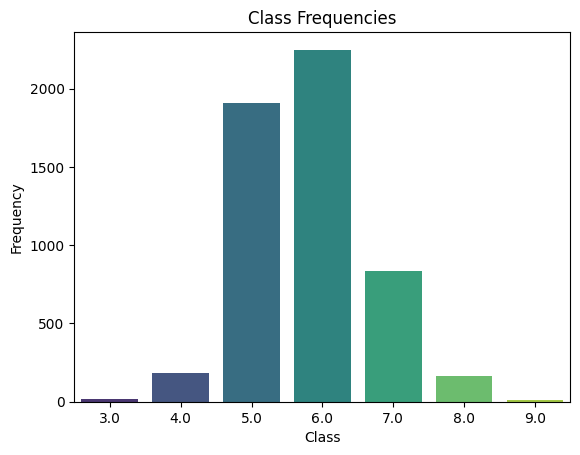

In [59]:
import seaborn as sns
label, freq = np.unique(y_train, return_counts=True);
sns.barplot(x=label, y=freq, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

# Oversampling with Smote

In [60]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=2)
# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
resampled_label, resampled_freq = np.unique(y_resampled, return_counts=True)
resampled_freq

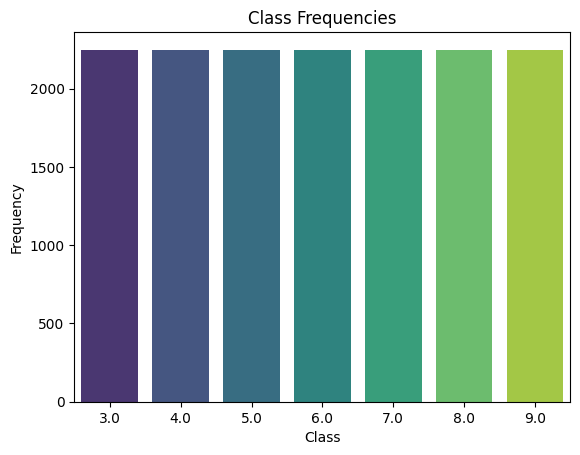

In [68]:
sns.barplot(x=resampled_label, y=resampled_freq, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Frequencies')
plt.show()

In [104]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Building Model

## Neural Network

In [98]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.initializers import HeNormal

In [99]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

In [100]:
lr = 0.001
epochs = 100
validation_data = (X_test, y_test)
optimizer = Adam(learning_rate=lr)
loss = MeanSquaredError()
initializer = HeNormal(seed=2)
metrics = [RootMeanSquaredError()]
lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [101]:
model = Sequential([
    InputLayer(X_resampled.shape[1]),
    Dense(2048, activation="relu", kernel_initializer=initializer),
    BatchNormalization(),
    Dense(1024, activation="relu", kernel_initializer=initializer),
    BatchNormalization(),
    Dense(512, activation="relu", kernel_initializer=initializer),
    BatchNormalization(),
    Dense(256, activation="relu", kernel_initializer=initializer),
    BatchNormalization(),
    Dense(128, activation="relu", kernel_initializer=initializer),
    BatchNormalization(),
    Dense(1, "linear"),
])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 2048)              28672     
                                                                 
 batch_normalization_26 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_38 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_27 (Bat  (None, 1024)             4096      
 chNormalization)                                                
                                                                 
 dense_39 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_28 (Bat  (None, 512)            

In [102]:
history = model.fit(X_resampled, y_resampled, epochs=epochs, validation_data=validation_data, callbacks=[lr_scheduler, early_stopping])

Epoch 1/100
492/492 [==============================] - 17s 31ms/step - loss: 7.8189 - root_mean_squared_error: 2.7962 - val_loss: 1.0236 - val_root_mean_squared_error: 1.0117 - lr: 0.0010
Epoch 2/100
492/492 [==============================] - 15s 31ms/step - loss: 0.7751 - root_mean_squared_error: 0.8804 - val_loss: 0.8925 - val_root_mean_squared_error: 0.9447 - lr: 0.0010
Epoch 3/100
492/492 [==============================] - 15s 31ms/step - loss: 0.6750 - root_mean_squared_error: 0.8216 - val_loss: 0.8077 - val_root_mean_squared_error: 0.8987 - lr: 0.0010
Epoch 4/100
492/492 [==============================] - 15s 31ms/step - loss: 0.6059 - root_mean_squared_error: 0.7784 - val_loss: 0.8742 - val_root_mean_squared_error: 0.9350 - lr: 0.0010
Epoch 5/100
492/492 [==============================] - 15s 31ms/step - loss: 0.5485 - root_mean_squared_error: 0.7406 - val_loss: 0.8128 - val_root_mean_squared_error: 0.9016 - lr: 0.0010
Epoch 6/100
492/492 [==============================] - 15s 3

KeyboardInterrupt: 

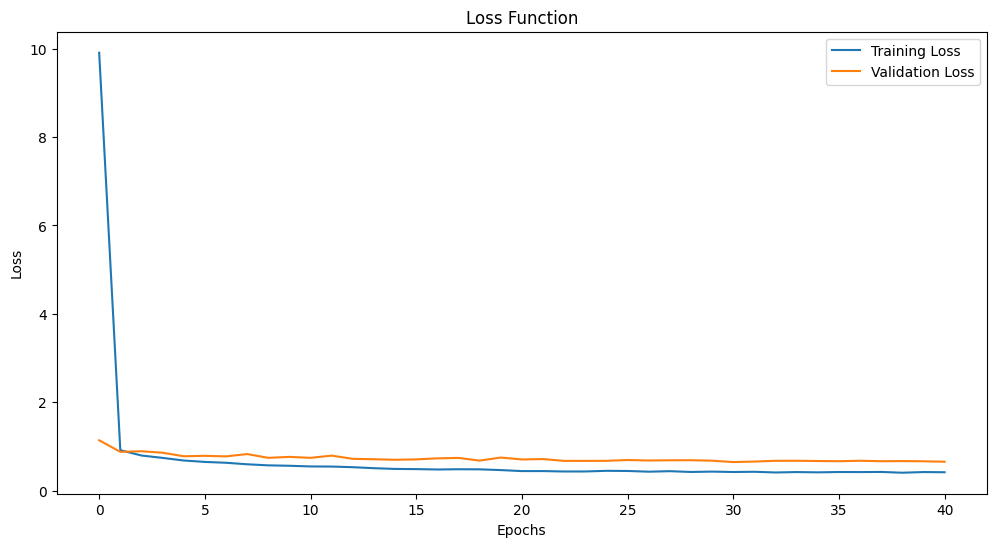

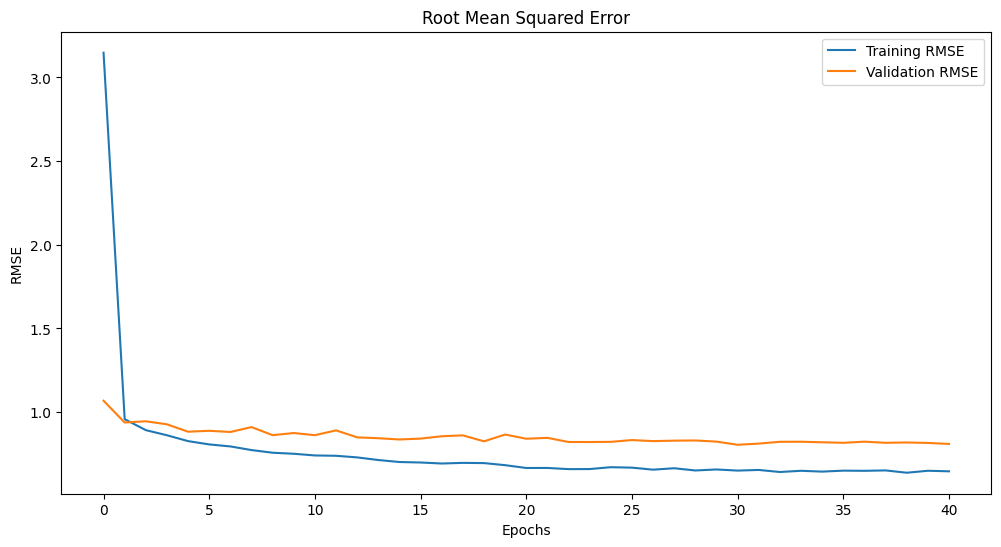

In [88]:
# Extract loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Calculate RMSE from Mean Squared Error (MSE)
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

# Plot the Loss Function
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.legend()
plt.show()

# Plot the RMSE
plt.figure(figsize=(12, 6))
plt.plot(rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error')
plt.legend()
plt.show()


In [89]:
test_loss, test_rmse = model.evaluate(X_resampled, y_resampled)

492/492 [==============================] - 1s 770us/step - loss: 0.2420 - root_mean_squared_error: 0.4919


In [90]:
predictions = model.predict(test)

# Round the predictions to the nearest integer
rounded_predictions = np.round(predictions)

26/26 [==============================] - 0s 816us/step


In [91]:
np.unique(rounded_predictions, return_counts=True)

(array([2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32),
 array([  1,   2,  42, 271, 297, 180,  26,   1], dtype=int64))

In [92]:
result_df = pd.DataFrame({"id": test_df["id"], "quality": rounded_predictions.flatten().astype("int")})

In [93]:
from sklearn.metrics import mean_squared_error
predicted_df = pd.read_csv("./predicted_scores.csv")
mean_squared_error(result_df["quality"], predicted_df["quality"])

0.9817073170731707

In [94]:
np.unique(predicted_df["quality"], return_counts=True), np.unique(result_df["quality"], return_counts=True), 

((array([3, 4, 5, 6, 7, 8], dtype=int64),
  array([ 11,  49, 198, 356, 168,  38], dtype=int64)),
 (array([2, 3, 4, 5, 6, 7, 8, 9]),
  array([  1,   2,  42, 271, 297, 180,  26,   1], dtype=int64)))

In [42]:
result_df

,id,quality
0,1257,7
1,6409,6
2,136,5
3,1631,7
4,6084,6
...,...,...
815,4646,6
816,734,5
817,5090,6
818,1579,7


In [ ]:
result_df.to_csv('result.csv', index=False)

In [ ]:
test

In [ ]:
correlation_matrix = train.corr()

# Extract highly correlated values in 'quality' column
highly_correlated = correlation_matrix[abs(correlation_matrix['quality']) > 0.5]['quality']

# Print the highly correlated values
print(highly_correlated)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="ticks")
sns.pairplot(train, diag_kind="kde", markers="o", hue="quality")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=123)
gb_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

## 

In [ ]:
def predict_to_df(model, name):
    result = model.predict(test); 
    rounded_predictions = np.round(predictions)
    print(np.unique(rounded_predictions, return_counts=True))
    result_df = pd.DataFrame({"id": test_df["id"], "quality": rounded_predictions.flatten().astype("int")})
    result_df.to_csv(f'{name}_result.csv', index=False)

In [ ]:
predict_to_df(gb_model, "gradient_boost")

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
predict_to_df(svr_model, "svr")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor model
rf_model.fit(X_train, y_train.ravel())

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error (RMSE): {rmse}')

In [ ]:
predict_to_df(rf_model, "random_forest")